# Factorisation de matrices

Réalisé par : Taycir YAHMED

In [204]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from time import time
from numpy.random import RandomState
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import text
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale

## Réduction de dimension par analyse en composantes principales (PCA)

Reprenons les images de chiffres manuscrits :

In [205]:
digits = load_digits()
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_digits = len(np.unique(y))

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


Affichons la base de données en dimension 2 après réduction de dimension de 64 à 2 avec une PCA:

In [206]:
pca = PCA(n_components=2)
Xnew = pca.fit_transform(X);

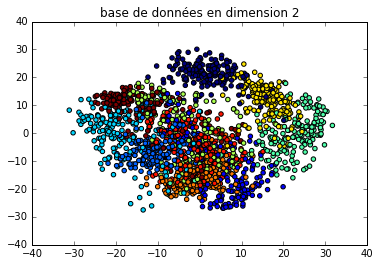

In [207]:
plt.scatter(Xnew[:,0],Xnew[:,1], c=y);
plt.title('base de données en dimension 2');

Clustering par K-moyennes de la base de données en utilisant les cractéristiques en 2D obtenues par PCA:

In [208]:
km = KMeans(n_clusters=10).fit(Xnew)
ypred = km.predict(Xnew)
print (accuracy_score(y,ypred))

0.031163049527


Clustering par K-moyennes de la base de données en utilisant les cractéristiques sans réduction de dimension:

In [209]:
km = KMeans(n_clusters=10).fit(X)
ypred = km.predict(X)
print (accuracy_score(y,ypred))

0.0161380077908


## Extraction de caractéristiques faciales

On commence par préparer les données et définir quelques fonctions utilitaires :

Dataset consists of 400 faces
2061 negative-valued pixels
2773 negative-valued pixels
2630 negative-valued pixels
1422 negative-valued pixels
1242 negative-valued pixels
1004 negative-valued pixels
2049 negative-valued pixels
1580 negative-valued pixels
1387 negative-valued pixels
3819 negative-valued pixels


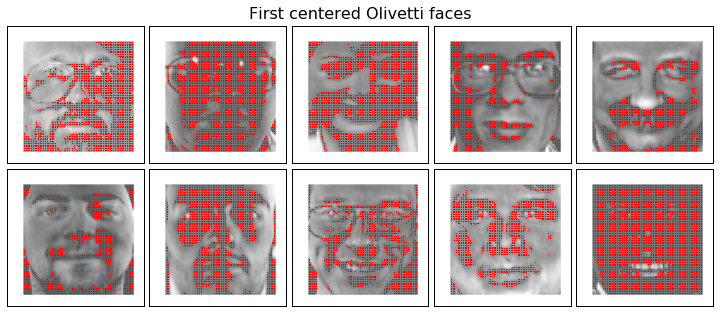

In [210]:
# -- Prepare data and define utility functions 

n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(data_home='c:/tmp/',shuffle=True,
                               random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print ("Dataset consists of %d faces" % n_samples)

def plot_gallery(title, images):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)

        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp<0)
        if len(dmy[0])>0:
            yz, xz = dmy
        comp[comp<0] = 0

        plt.imshow(comp, cmap=plt.cm.gray, vmax=vmax, vmin=vmin)

        if len(dmy[0])>0:
            plt.plot( xz, yz, 'r,', hold=True)
            print (len(dmy[0]), "negative-valued pixels")

        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
plot_gallery("First centered Olivetti faces",
             faces_centered[:n_components])


On définit les méthodes à tester et leur paramétrisation:

In [211]:
# -- Decomposition methods 

# List of the different estimators and whether to center the data

estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components),
     False)
]


Et on applique à la base de données d'images :

Extracting the top 10 Eigenfaces - PCA...
done in 0.046s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
1880 negative-valued pixels
2221 negative-valued pixels
2131 negative-valued pixels
Extracting the top 10 Non-negative components - NMF...
done in 0.992s


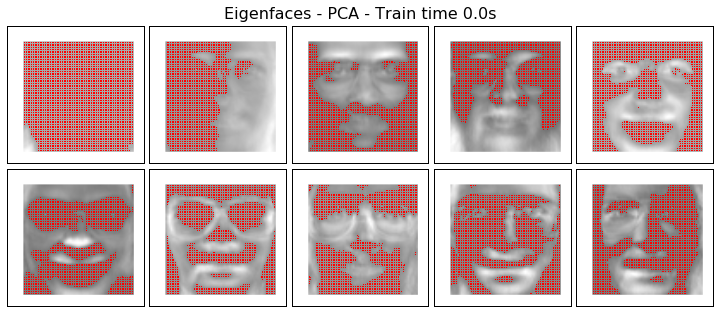

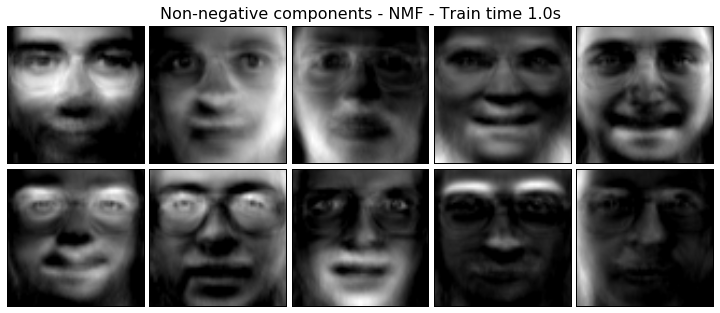

In [212]:
# -- Transform

labels = dataset.target
X = faces
X_ = faces_centered

for shortname, name, estimator, center in estimators:
    #if shortname != 'nmf': continue
    print ("Extracting the top %d %s..." % (n_components, name))
    t0 = time()

    data = X
    if center:
        data = X_
        
    False
    data = estimator.fit_transform(data)

    train_time = (time() - t0)
    print ("done in %0.3fs" % train_time)

    components_ = estimator.components_

    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

#### Analyse du type de décomposition obtenu par NMF en comparaison avec celui obtenu par PCA.

On remarque que les images obtenues par NMF sont plus représentatifs que ceux obtenues par PCA. Ceci explique la différence du temps de calcul entre les 2 méthodes.

#### Evaluation des performances d'un système de reconnaissance automatique de visages utilisant les caractéristiques extraites par PCA, comparées à celles obtenues par un système exploitant les caractéristiques extraites par NMF. 

In [213]:
for shortname, name, estimator, center in estimators:
    #if shortname != 'nmf': continue
    
    print ("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    
    faces = dataset.data
    data = faces
    
    if center:
        data = faces - faces.mean(axis=0, dtype=np.float64)

    data = estimator.fit_transform(data)

    train_time = (time() - t0)
    print ("done in %0.3fs" % train_time)
    
    lr = LogisticRegression()
    data = scale(data, with_mean= False)
    lr.fit(data, labels);

    print (name, cross_val_score (lr,data,labels).mean())
    print()
    

Extracting the top 10 Eigenfaces - PCA...
done in 0.060s
Eigenfaces - PCA 0.815972222222

Extracting the top 10 Non-negative components - NMF...
done in 1.088s
Non-negative components - NMF 0.75



####  Evolution des scores en faisant varier le nombre de composantes utilisé dans les décompositions.

In [ ]:
estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components),
     False)
]

nbcomponents = range(1,64,3)
ll = []

for shortname, name, estimator, center in estimators:
    
    l = []
    for n_components in nbcomponents:
        faces = dataset.data
        data = faces
        if center:
            data = faces - faces.mean(axis=0, dtype=np.float64)

        data = estimator.fit_transform(data)

        lr = LogisticRegression()
        data = scale(data, with_mean= False)
        lr.fit(data, labels);
        l.append(cross_val_score (lr,data,labels).mean())
        
    ll.append(l)

In [ ]:
plt.plot(ll[0]);
plt.plot(ll[1]);


## Extraction de thèmes à partir de textes

On commence par définir quelques paramètres d'expérience :

In [174]:
n_samples = 1000
n_features = 900
n_topics = 4
n_top_words = 20

 On charge les textes de certaines catégories du corpus [20newsgroups](http://qwone.com/~jason/20Newsgroups/) :

In [175]:
# Load the 20 newsgroups dataset 

t0 = time()

# Load some categories from the training set
categories = ['rec.sport.baseball','comp.graphics', 'comp.sys.mac.hardware',
              'talk.religion.misc']

print ("Loading dataset...")
dataset = datasets.fetch_20newsgroups(data_home='c:/data/text/', shuffle=True,
                                      categories=categories, random_state=1)

print ("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 0.190s.


On représente chaque document par sa [TF-IDF](https://fr.wikipedia.org/wiki/TF-IDF) : 

In [176]:
# vectorize data using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)

print ("Extracting TF-IDF features...")
t0 = time()
vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features, stop_words='english')
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print ("done in %0.3fs." % (time() - t0))

Extracting TF-IDF features...
done in 0.194s.


In [177]:
type(counts)

scipy.sparse.csr.csr_matrix

On applique la NMF :

In [178]:
# Fit the NMF model
print ("Fitting the NMF model with n_samples=%d and n_features=%d..." % (
    n_samples, n_features))

t0 = time()
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf)
print ("done in %0.3fs." % (time() - t0))



Fitting the NMF model with n_samples=1000 and n_features=900...
done in 0.070s.


Et on interprète les "vecteurs de base" comme des thèmes :

In [179]:
# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print ( "Topic #%d:" % topic_idx)
    print (" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
edu year article team baseball cs players writes game university runs host nntp posting jewish good hit season games win
Topic #1:
graphics files file uk thanks ac 3d program package help ca image windows university computer need format posting use com
Topic #2:
com god jesus sandvik people christian writes bible don kent christians brian netcom koresh article life said newton just apple
Topic #3:
mac apple edu drive scsi quadra monitor problem video centris duo se problems card power drives software internal disk ram


$\rightarrow $ La NMF permet donc de réaliser du clustering "doux" de documents : chaque document peut être associé à plusieurs thèmes à la fois.


#### Reproduisons l'expérience précédente en utilisant des GMM et en interprétant les thèmes à partir des centroïdes de chaque cluster.

In [180]:
gmm = GaussianMixture(n_components=n_topics).fit(tfidf.toarray())

In [181]:
for topic_idx, topic in enumerate(gmm.means_):
    print ( "Topic #%d:" % topic_idx)
    print (" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
edu com writes article year baseball team cs think game players don good just jewish people university god did know
Topic #1:
edu graphics thanks mac university posting host nntp use software need looking help 3d ca se card mail color computer
Topic #2:
edu apple quadra drive cleveland monitor mac centris scsi cwru problem university article posting host nntp duo freenet com mit
Topic #3:
com uk ac sandvik ibm files tiff apple does kent graphics ca file posting reply writes know access newton nntp


#### Comparer le résultat obtenu au résultat NMF:

On remarque que les deux méthodes donnent des résultats très proches:
- Le thème #0 de NMF va avec le thème #0 de GMM
- Le thème #1 de NMF va avec le thème #3 de GMM
- Le thème #2 de NMF va avec le thème #2 de GMM
- Le thème #3 de NMF va avec le thème #1 de GMM

In [182]:
Xgmm = gmm.predict_proba(tfidf.toarray())
Xnmf = nmf.transform(tfidf)[:,np.argsort([0,3,2,1])]

print ((Xnmf.argmin(axis=1)==Xgmm.argmin(axis=1)).sum()/n_samples)

0.533


In [183]:
(Xnmf.argmax(axis=1)==Xgmm.argmax(axis=1)).sum(axis=0)/n_samples

0.38700000000000001